In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('dataset/wafer_defect_scans.csv')
df.head()

,LOT_ID,WAFER_ID,WAFER_SCRIBE_ID,INSPECTION_DATE,REAL_WAFER_X,REAL_WAFER_Y
0,L9193070,2,CZ6VP002JME7,2019-08-30 19:08:23,-126085.649,-58984.061
1,L9193070,2,CZ6VP002JME7,2019-08-30 19:08:23,-121082.798,20609.006
2,L9193070,2,CZ6VP002JME7,2019-08-30 19:08:23,-116857.277,-32152.882
3,L9193070,2,CZ6VP002JME7,2019-08-30 19:08:23,-116424.445,812.345
4,L9193070,2,CZ6VP002JME7,2019-08-30 19:08:23,-114201.168,-38353.723


In [35]:
df.describe()

,WAFER_ID,REAL_WAFER_X,REAL_WAFER_Y
count,251656.000000,251656.000000,251656.000000
mean,257.999336,17461.493177,-8566.614313
std,227.834533,59104.063809,68094.759972
min,1.000000,-143368.468000,-144592.654000
25%,79.000000,-11832.381000,-62245.006250
50%,155.000000,9343.222500,-15415.741500
75%,360.000000,69567.793250,50428.717250
max,972.000000,143575.667000,146373.224000


In [36]:
df.dtypes

LOT_ID              object
WAFER_ID             int64
WAFER_SCRIBE_ID     object
INSPECTION_DATE     object
REAL_WAFER_X       float64
REAL_WAFER_Y       float64
dtype: object

In [120]:
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'])

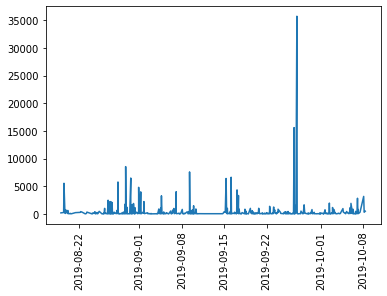

In [129]:
time_df = df.groupby(['INSPECTION_DATE']).size()
sns.lineplot(data=time_df)
plt.xticks(rotation=90)
plt.show()

## Data relationship check

In [130]:
df.groupby(['LOT_ID']).size()

LOT_ID
H9195980     190
H9195990      67
H9201370     102
H9203230     221
H9211250      43
            ... 
L9296530     106
L9304630    3181
L9305100      43
L9305590      47
L9306030      96
Length: 478, dtype: int64

In [131]:
df.groupby(['LOT_ID','WAFER_ID']).size()

LOT_ID    WAFER_ID
H9195980  163          20
          164         170
H9195990  107          32
          108          35
H9201370  214          74
                     ... 
L9305100  7            28
L9305590  62           25
          63           22
L9306030  703          56
          711          40
Length: 1103, dtype: int64

In [132]:
df.groupby(['LOT_ID','WAFER_ID','WAFER_SCRIBE_ID']).size()

LOT_ID    WAFER_ID  WAFER_SCRIBE_ID
H9195980  163       DC2CM163JMC6        20
          164       DC2CM164JMH0       170
H9195990  107       DC2DB107JKA2        32
          108       DC2DB108JKE4        35
H9201370  214       IFZBJ214MMG0        74
                                      ... 
L9305100  7         M7FMY007WAB0        28
L9305590  62        IFZPD062MMC4        25
          63        IFZPD063MMG6        22
L9306030  703       M7F5A703WAA1        56
          711       M7F5A711WAD4        40
Length: 1103, dtype: int64

In [133]:
# Relationship between LOT_ID & WAFER_ID and WAFER_SCRIBE_ID is 1 to 1
print(sum(df.groupby(['LOT_ID','WAFER_ID','WAFER_SCRIBE_ID']
              ).size().to_numpy() != df.groupby(
    ['LOT_ID','WAFER_ID']).size().to_numpy()))

uniq_df1 = df.groupby(['WAFER_SCRIBE_ID','LOT_ID','WAFER_ID']).size().reset_index()
uniq_df2 = df.groupby(['LOT_ID','WAFER_ID','WAFER_SCRIBE_ID']).size().reset_index()
sum(pd.merge(uniq_df2,uniq_df1,
    on=['WAFER_SCRIBE_ID','LOT_ID','WAFER_ID'],how='left')['0_y'].isna())

0


0

## Displaying wafer scan

In [136]:
df_xy = df[df['WAFER_SCRIBE_ID'] == 'CZ6VP002JME7']

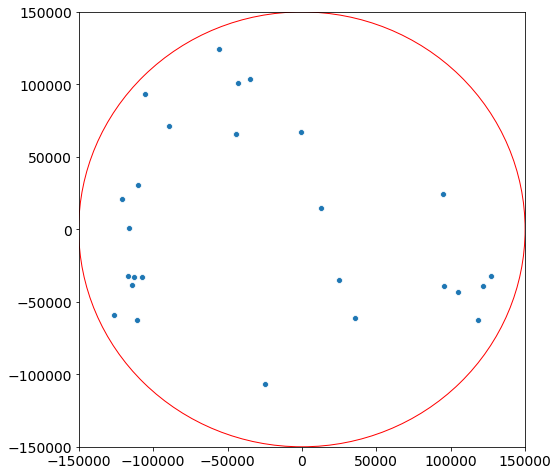

In [137]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df_xy,x='REAL_WAFER_X',y='REAL_WAFER_Y')
plt.xlim([-150000,150000])
plt.ylim([-150000,150000])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')
circle = plt.Circle((0, 0), 150000, 
                    color='r',fill=None)
ax.add_patch(circle)
plt.show()